# Binary classification

## Synthetic example

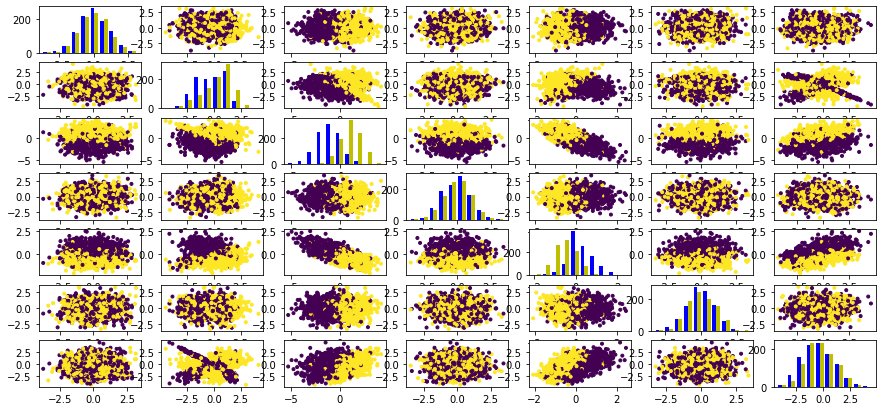

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.calibration import CalibratedClassifierCV

n_features = 7
X, y = datasets.make_classification(n_classes=2, n_samples=10000,
                                    n_clusters_per_class=3,
                                    n_features=n_features,
                                    n_informative=int(n_features/2),
                                    n_redundant=int(n_features/4),
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=42)

fig = plt.figure(figsize=(15, 7))
for i in range(n_features):
    for j in range(n_features):
        ax = fig.add_subplot(n_features, n_features, 1 + i + j*n_features)
        if i == j:
            x_per_class = [X_train[np.where(y_train == this_class)[0],i] for this_class in np.unique(y_train)]
            ax.hist(x_per_class, color=['b', 'y'])
        else:
            ax.scatter(X_train[:,i], X_train[:,j], c=y_train, marker='.')

# Reliability diagram

## Questions


(8000, 1)


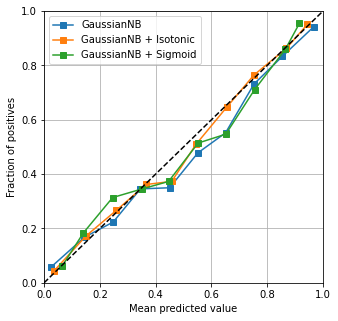

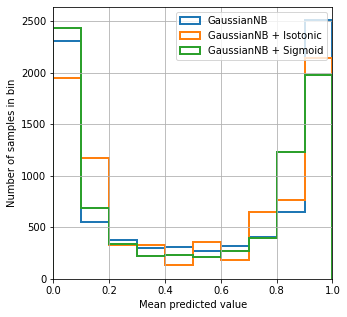

In [2]:
from pycalib.visualisations import plot_reliability_diagram

estimators = [(GaussianNB(), 'GaussianNB'),
              (CalibratedClassifierCV(GaussianNB(), cv=4, method='isotonic'), 'GaussianNB + Isotonic'),
              (CalibratedClassifierCV(GaussianNB(), cv=4, method='sigmoid'), 'GaussianNB + Sigmoid')
             ]

legend = [aux[1] for aux in estimators]
scores = []
for clf, name in estimators:
    clf.fit(X_train, y_train)
    scores.append(clf.predict_proba(X_test))
    
    
_ = plot_reliability_diagram(y_test, scores, legend=legend, histogram=True)

# Calibration map

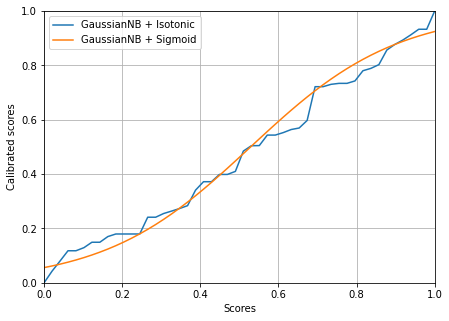

In [3]:
scores_linspace = np.linspace(0, 1, 50)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
for clf, name in estimators:
    if not hasattr(clf, 'calibrated_classifiers_'):
        continue
    classifiers = clf.calibrated_classifiers_
    calibrated = np.mean([cla.calibrators_[0].predict(scores_linspace) for cla in classifiers], axis=0)
    ax.plot(scores_linspace, calibrated, label=name)
ax.legend()
ax.set_xlabel('Scores')
ax.set_ylabel('Calibrated scores')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid()

# Reliability diagram discrepancy

## Questions

- The red gaps are centerd into the mean score of each bin.

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/miquel/git/uob/classifier-calibration/hands_on/lib/PyCalib/pycalib/visualisations/__init__.py:138: RuntimeWarning: Mean of empty slice
  pred_mean[i] = np.nanmean(p_pred[bin_indices])


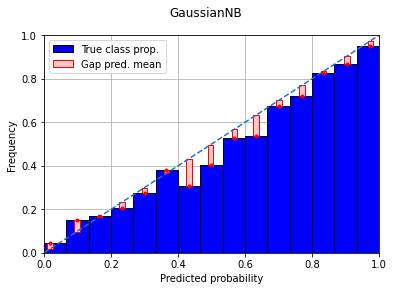

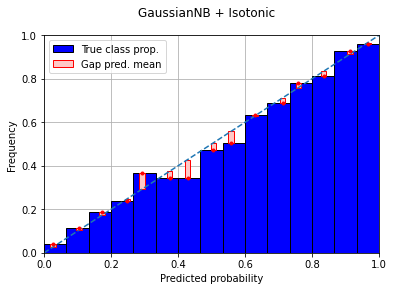

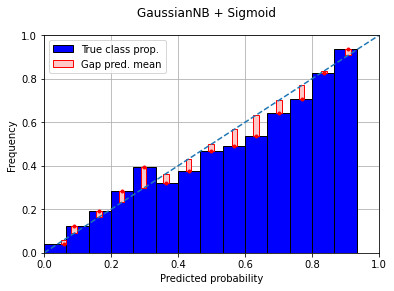

In [4]:
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps

for clf, name in estimators:
    est_scores = clf.predict_proba(X_test)
    fig = plot_multiclass_reliability_diagram_gaps(y_test, est_scores[:, 1], n_bins=15)
    fig.suptitle(name)

# Multiclass classification

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/scipy/sparse/base.py:585: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)
/home/miquel/git/uob/classifier-calibration/hands_on/lib/PyCalib/pycalib/visualisations/__init__.py:138: RuntimeWarning: Mean of empty slice
  pred_mean[i] = np.nanmean(p_pred[bin_indices])
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/scipy/sparse/base.py:585: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)
/home/miquel/git/uob/classifier-calibration/hands_on/lib/PyCalib/pycalib/visualisations/__init__.py:138: RuntimeWarning: Mean of empty slice
  pred_mean[i] = np.nanmean(p_pred[bin_indices])


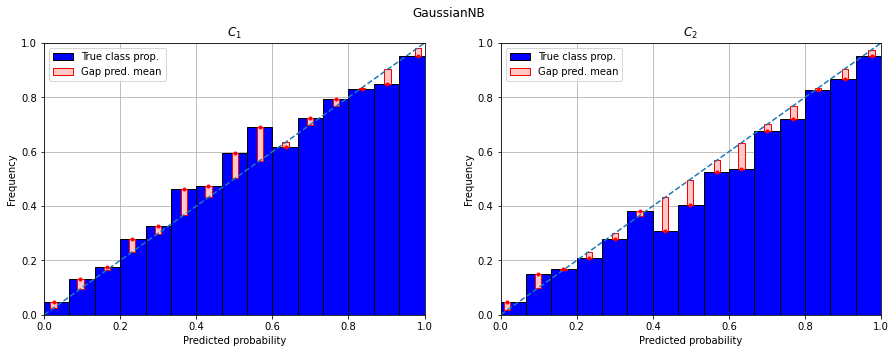

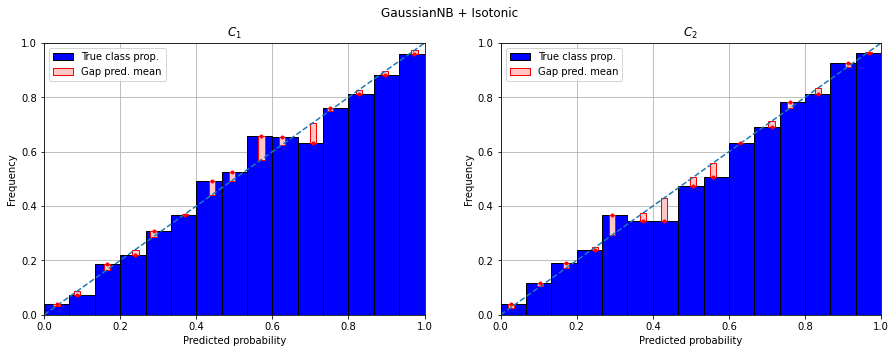

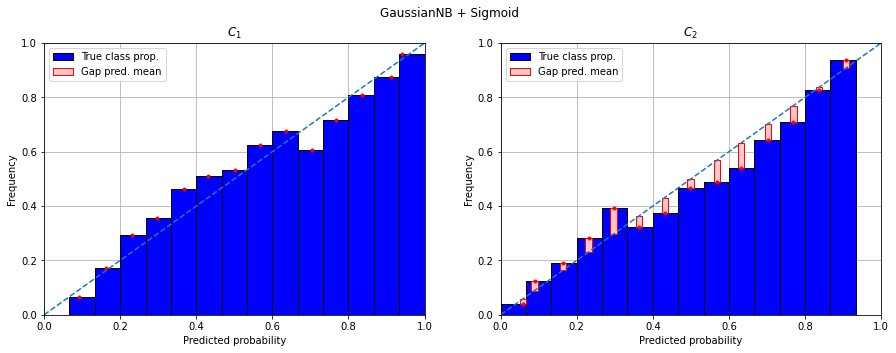

In [5]:
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps_per_class

for clf, name in estimators:
    est_scores = clf.predict_proba(X_test)
    fig = plt.figure(figsize=(15,5))
    fig = plot_multiclass_reliability_diagram_gaps_per_class(y_test, est_scores, n_bins=15, fig=fig)
    fig.suptitle(name)
    